<a href="https://colab.research.google.com/github/ajeetkbhardwaj/Learning-to-Master-Artificial-Intelligence/blob/main/Lab_xx_MAB_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab-xx : Multi-Armed Bandith Problem


## Step-1 : Multi-armed Bandith Enviroment

In [1]:
import torch


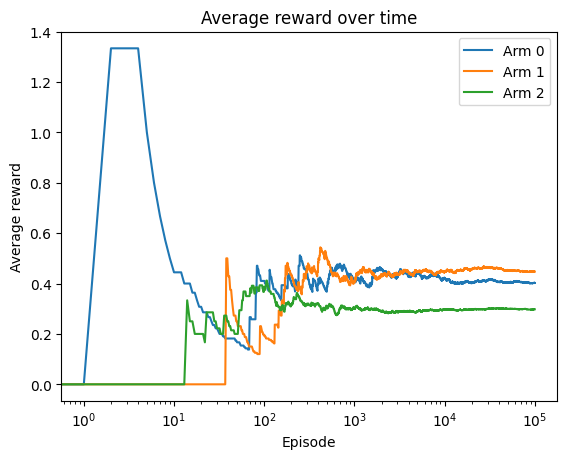

In [2]:
# creating a MAD Enviroment
class BanditEnv():
    """
    Multi-armed bandit environment
    payout_list:
        A list of probabilities of the likelihood that a particular bandit will pay out
    reward_list:
        A list of rewards of the payout that bandit has
    """
    def __init__(self, payout_list, reward_list):
        self.payout_list = payout_list
        self.reward_list = reward_list

    def step(self, action):
        if torch.rand(1).item() < self.payout_list[action]:
            return self.reward_list[action]
        return 0



if __name__ == "__main__":
  # We will create a 3-multi-armed bandith and an instance for bandith enviroment
    bandit_payout = [0.1, 0.15, 0.3]
    bandit_reward = [4, 3, 1]
    # 10% chance of getting a reward of 4
    bandit_env = BanditEnv(bandit_payout, bandit_reward)

    # number of episodes to run
    n_episode = 100000
    #  the lists holding the total rewards accumulated by
    # choosing individual arms
    n_action = len(bandit_payout)
    action_count = [0 for _ in range(n_action)]
    #  the number of times individual arms are chosen
    action_total_reward = [0 for _ in range(n_action)]
    # the avg reward overtime for each arm
    action_avg_reward = [[] for action in range(n_action)]
    # define a random policy which randomly selects an arm
    def random_policy():
        action = torch.multinomial(torch.ones(n_action), 1).item()
        return action

   # run 100000 times and for each episode we update the statistics of each arm
    for episode in range(n_episode):
        action = random_policy()
        reward = bandit_env.step(action)
        action_count[action] += 1
        action_total_reward[action] += reward
        for a in range(n_action):
            if action_count[a]:
                action_avg_reward[a].append(action_total_reward[a] / action_count[a])
            else:
                action_avg_reward[a].append(0)

    # After running 100,000 episodes,
    # we plot the results of average reward over time
    import matplotlib.pyplot as plt
    for action in range(n_action):
        plt.plot(action_avg_reward[action])

    plt.legend(['Arm {}'.format(action) for action in range(n_action)])
    plt.xscale('log')
    plt.title('Average reward over time')
    plt.xlabel('Episode')
    plt.ylabel('Average reward')
    plt.show()

**Interpretation**
> We have 3 slot machines. each machine has a different payout reward and probability. In each episode we randomly choose one arm of machine to pull i.e one action to execute and get a payout at a certain probability. Now comming to the output figure, Arm 0 is the best arm with the largest avg reward but started saturation around 10000 episodes. It's the most naive approach in which we only perform the arm exploration.

## Step-2 : Solving MAD Problemnt with ϵ-greedy policy

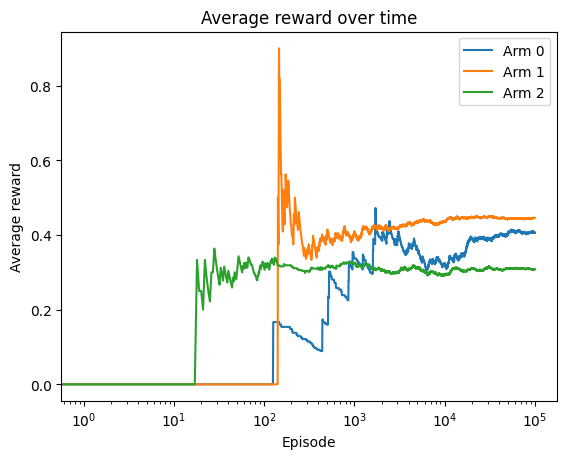

0.43367


In [3]:
# Payout probabilities
bandit_payout = [0.1, 0.15, 0.3]
# Payout rewards for 3-AB Problem
bandit_reward = [4, 3, 1]
# an instance of bandith enviroment
bandit_env = BanditEnv(bandit_payout, bandit_reward)

# number of episodes to run
n_episode = 100000
n_action = len(bandit_payout)
#  the number of times individual arms are chosen
action_count = [0 for _ in range(n_action)]
# the lists holding the total rewards accumulated by choosing individual arms
action_total_reward = [0 for _ in range(n_action)]
# the average reward over time for each arm
action_avg_reward = [[] for action in range(n_action)]

# the epsilon-greedy policy function
def gen_epsilon_greedy_policy(n_action, epsilon):
    def policy_function(Q):
        probs = torch.ones(n_action) * epsilon / n_action
        best_action = torch.argmax(Q).item()
        probs[best_action] += 1.0 - epsilon
        action = torch.multinomial(probs, 1).item()
        return action
    return policy_function

epsilon = 0.2
#  the value of epsilon, and create an epsilon-greedy policy instance
epsilon_greedy_policy = gen_epsilon_greedy_policy(n_action, epsilon)

# Initialize the Q function,
# which is the average reward obtained by individual arms:
Q = torch.zeros(n_action)

for episode in range(n_episode):
    action = epsilon_greedy_policy(Q)
    reward = bandit_env.step(action)
    action_count[action] += 1
    action_total_reward[action] += reward
    Q[action] = action_total_reward[action] / action_count[action]
    for a in range(n_action):
        if action_count[a]:
            action_avg_reward[a].append(action_total_reward[a] / action_count[a])
        else:
            action_avg_reward[a].append(0)


import matplotlib.pyplot as plt
for action in range(n_action):
    plt.plot(action_avg_reward[action])

plt.legend(['Arm {}'.format(action) for action in range(n_action)])
plt.xscale('log')
plt.title('Average reward over time')
plt.xlabel('Episode')
plt.ylabel('Average reward')
plt.show()


print(sum(action_total_reward) / n_episode)

## Step-3 : Solving MAB Problem with Softmax Exploration

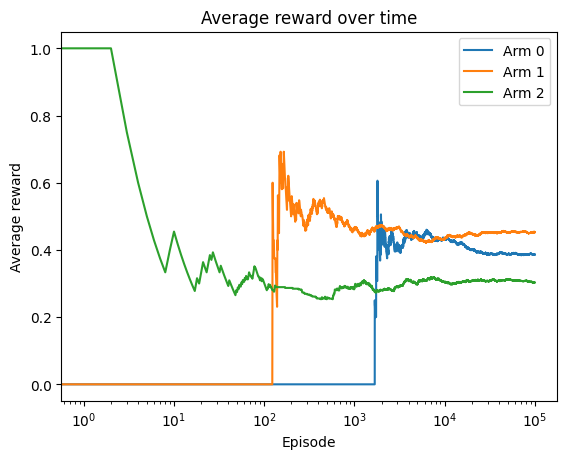

In [4]:

bandit_payout = [0.1, 0.15, 0.3]
bandit_reward = [4, 3, 1]
bandit_env = BanditEnv(bandit_payout, bandit_reward)

n_episode = 100000
n_action = len(bandit_payout)
action_count = [0 for _ in range(n_action)]
action_total_reward = [0 for _ in range(n_action)]
action_avg_reward = [[] for action in range(n_action)]



def gen_softmax_exploration_policy(tau):
    def policy_function(Q):
        probs = torch.exp(Q / tau)
        probs = probs / torch.sum(probs)
        action = torch.multinomial(probs, 1).item()
        return action
    return policy_function

tau = 0.1

softmax_exploration_policy = gen_softmax_exploration_policy(tau)

Q = torch.zeros(n_action)

for episode in range(n_episode):
    action = softmax_exploration_policy(Q)
    reward = bandit_env.step(action)
    action_count[action] += 1
    action_total_reward[action] += reward
    Q[action] = action_total_reward[action] / action_count[action]

    for a in range(n_action):
        if action_count[a]:
            action_avg_reward[a].append(action_total_reward[a] / action_count[a])
        else:
            action_avg_reward[a].append(0)


import matplotlib.pyplot as plt
for action in range(n_action):
    plt.plot(action_avg_reward[action])

plt.legend(['Arm {}'.format(action) for action in range(n_action)])
plt.xscale('log')
plt.title('Average reward over time')
plt.xlabel('Episode')
plt.ylabel('Average reward')
plt.show()

## Step-4 : Solving MAB Problem with Upper Confidance Bound(UCB)


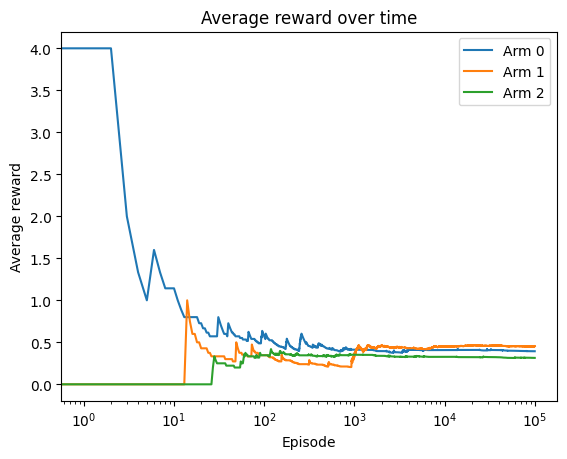

0.44869


In [5]:

bandit_payout = [0.1, 0.15, 0.3]
bandit_reward = [4, 3, 1]
bandit_env = BanditEnv(bandit_payout, bandit_reward)

n_episode = 100000
n_action = len(bandit_payout)
action_count = torch.tensor([0. for _ in range(n_action)])
action_total_reward = [0 for _ in range(n_action)]
action_avg_reward = [[] for action in range(n_action)]



def upper_confidence_bound(Q, action_count, t):
    ucb = torch.sqrt((2 * torch.log(torch.tensor(float(t)))) / action_count) + Q
    return torch.argmax(ucb)



Q = torch.empty(n_action)

for episode in range(n_episode):
    action = upper_confidence_bound(Q, action_count, episode)
    reward = bandit_env.step(action)
    action_count[action] += 1
    action_total_reward[action] += reward
    Q[action] = action_total_reward[action] / action_count[action]

    for a in range(n_action):
        if action_count[a]:
            action_avg_reward[a].append(action_total_reward[a] / action_count[a])
        else:
            action_avg_reward[a].append(0)


import matplotlib.pyplot as plt
for action in range(n_action):
    plt.plot(action_avg_reward[action])

plt.legend(['Arm {}'.format(action) for action in range(n_action)])
plt.xscale('log')
plt.title('Average reward over time')
plt.xlabel('Episode')
plt.ylabel('Average reward')
plt.show()


print(sum(action_total_reward) / n_episode)

## Step-5 : Solving MAB Problem with Thompson Sampling

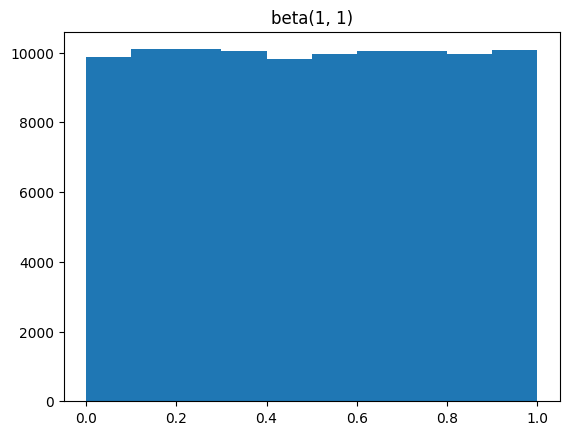

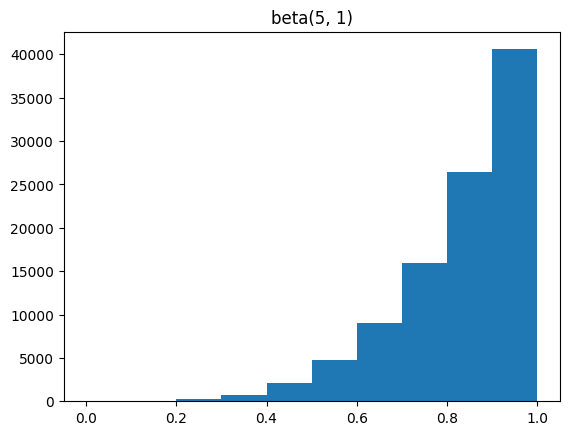

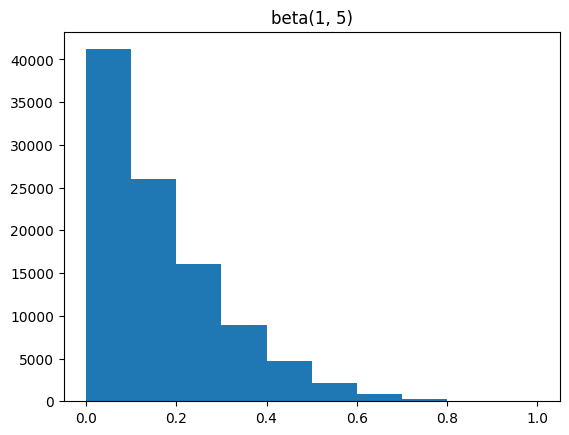

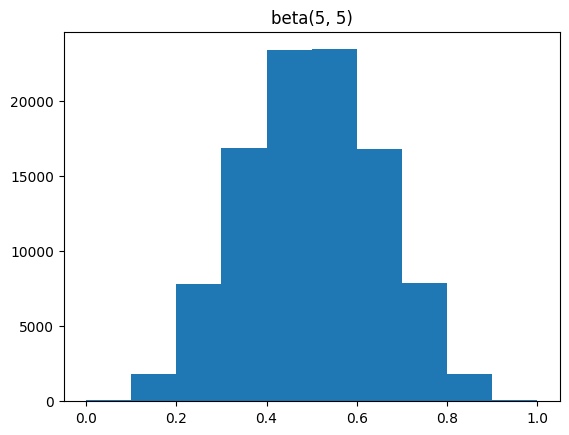

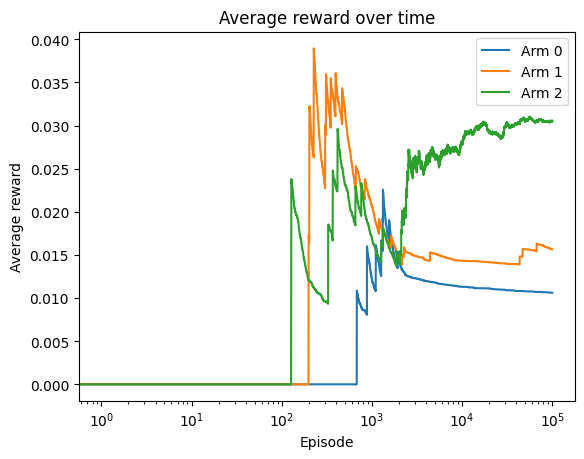

In [7]:

beta1 = torch.distributions.beta.Beta(1, 1)
samples1 = [beta1.sample() for _ in range(100000)]
plt.hist(samples1, range=[0, 1], bins=10)
plt.title('beta(1, 1)')
plt.show()

beta2 = torch.distributions.beta.Beta(5, 1)
samples2 = [beta2.sample() for _ in range(100000)]
plt.hist(samples2, range=[0, 1], bins=10)
plt.title('beta(5, 1)')
plt.show()

beta3 = torch.distributions.beta.Beta(1, 5)
samples3= [beta3.sample() for _ in range(100000)]
plt.hist(samples3, range=[0, 1], bins=10)
plt.title('beta(1, 5)')
plt.show()

beta4 = torch.distributions.beta.Beta(5, 5)
samples4= [beta4.sample() for _ in range(100000)]
plt.hist(samples4, range=[0, 1], bins=10)
plt.title('beta(5, 5)')
plt.show()


bandit_payout = [0.01, 0.015, 0.03]
bandit_reward = [1, 1, 1]
bandit_env = BanditEnv(bandit_payout, bandit_reward)

n_episode = 100000
n_action = len(bandit_payout)
action_count = torch.tensor([0. for _ in range(n_action)])
action_total_reward = [0 for _ in range(n_action)]
action_avg_reward = [[] for action in range(n_action)]



def thompson_sampling(alpha, beta):
    prior_values = torch.distributions.beta.Beta(alpha, beta).sample()
    return torch.argmax(prior_values)


alpha = torch.ones(n_action)
beta = torch.ones(n_action)


for episode in range(n_episode):
    action = thompson_sampling(alpha, beta)
    reward = bandit_env.step(action)
    action_count[action] += 1
    action_total_reward[action] += reward

    if reward > 0:
        alpha[action] += 1
    else:
        beta[action] += 1

    for a in range(n_action):
        if action_count[a]:
            action_avg_reward[a].append(action_total_reward[a] / action_count[a])
        else:
            action_avg_reward[a].append(0)



for action in range(n_action):
    plt.plot(action_avg_reward[action])

plt.legend(['Arm {}'.format(action) for action in range(n_action)])
plt.xscale('log')
plt.title('Average reward over time')
plt.xlabel('Episode')
plt.ylabel('Average reward')
plt.show()